This notebook is to analyse weather data as pertaining to the experimental site in Gollion, Vaud. It will be used to create graphs of weather patters, which can then be compared to soil and vegetative changes over time.

Data is found locally on Marissa's computer in C:\Hobbies\programming\data\weather data

Weather station Cossonay is closest to the experimental site.

In [1]:
import laspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from colorspacious import cspace_converter
import matplotlib as mpl
import scipy 
import datetime

from pathlib import Path

base_dir = "C:/Hobbies/programming/data/weather_data"



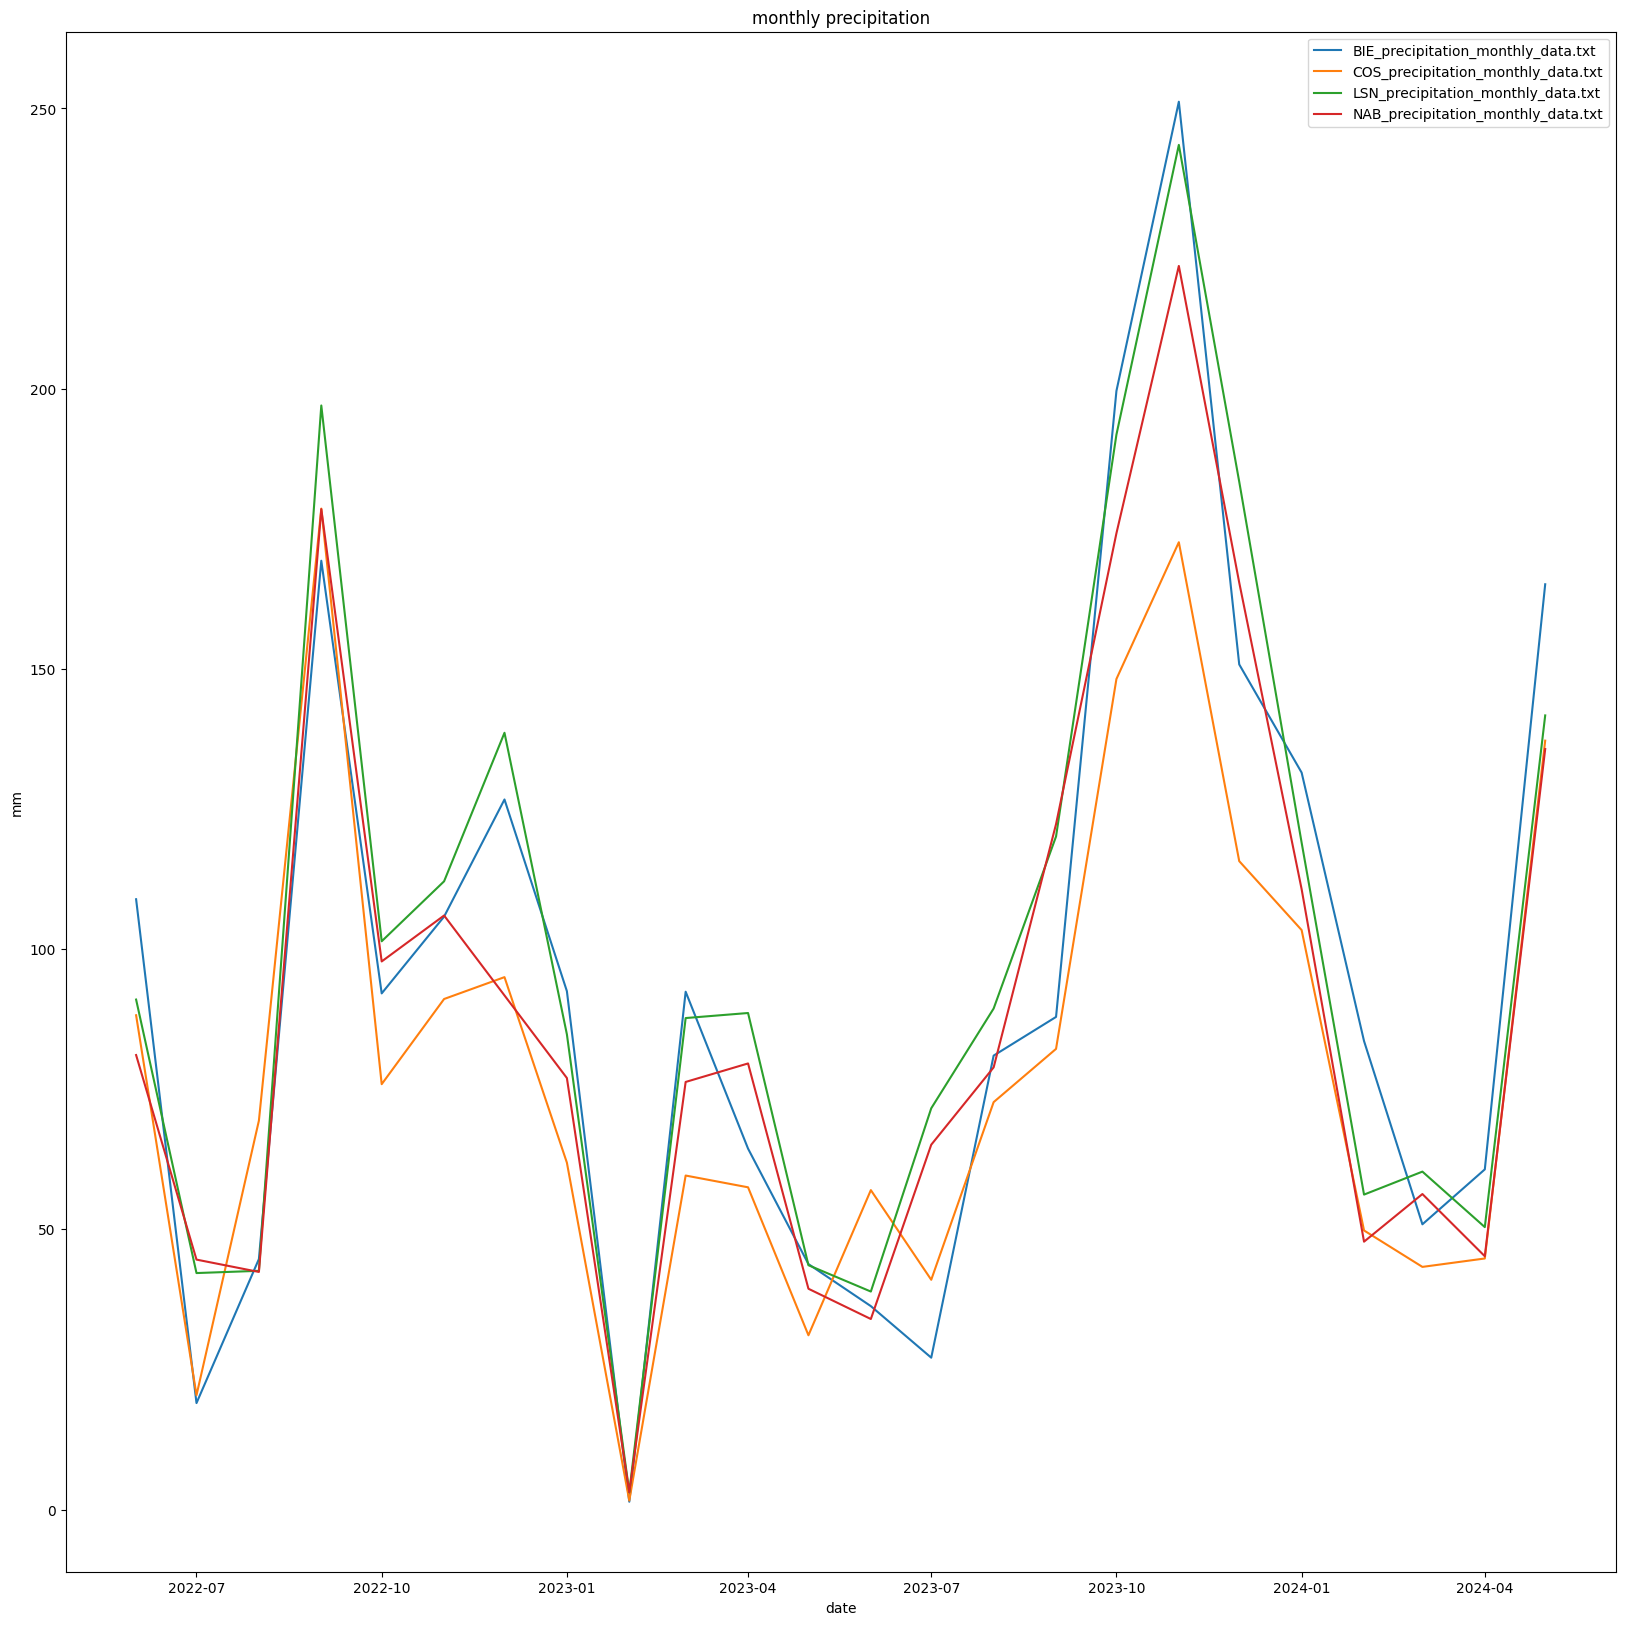

In [3]:
path = Path(base_dir)
weather_data = path.glob('*_precipitation_monthly_data.txt')

plt.figure(figsize = (20,20))
for data in weather_data:
    dataset = pd.read_csv(data, sep = ';')
    dataframe = pd.DataFrame(
        {'year': [str(d)[:4] for d in dataset['time']],
        'month': [str(d)[4:] for d in dataset['time']],
        'day': 1})
    time = pd.to_datetime(dataframe)
    plt.plot(time, dataset['rre150m0'], alpha = 1, label = data.name)
    plt.title('monthly precipitation')
    plt.xlabel('date')
    plt.ylabel('mm')
    plt.legend()
    
plt.savefig("C:/Hobbies/programming/figures/monthly_precipitation.png")
    

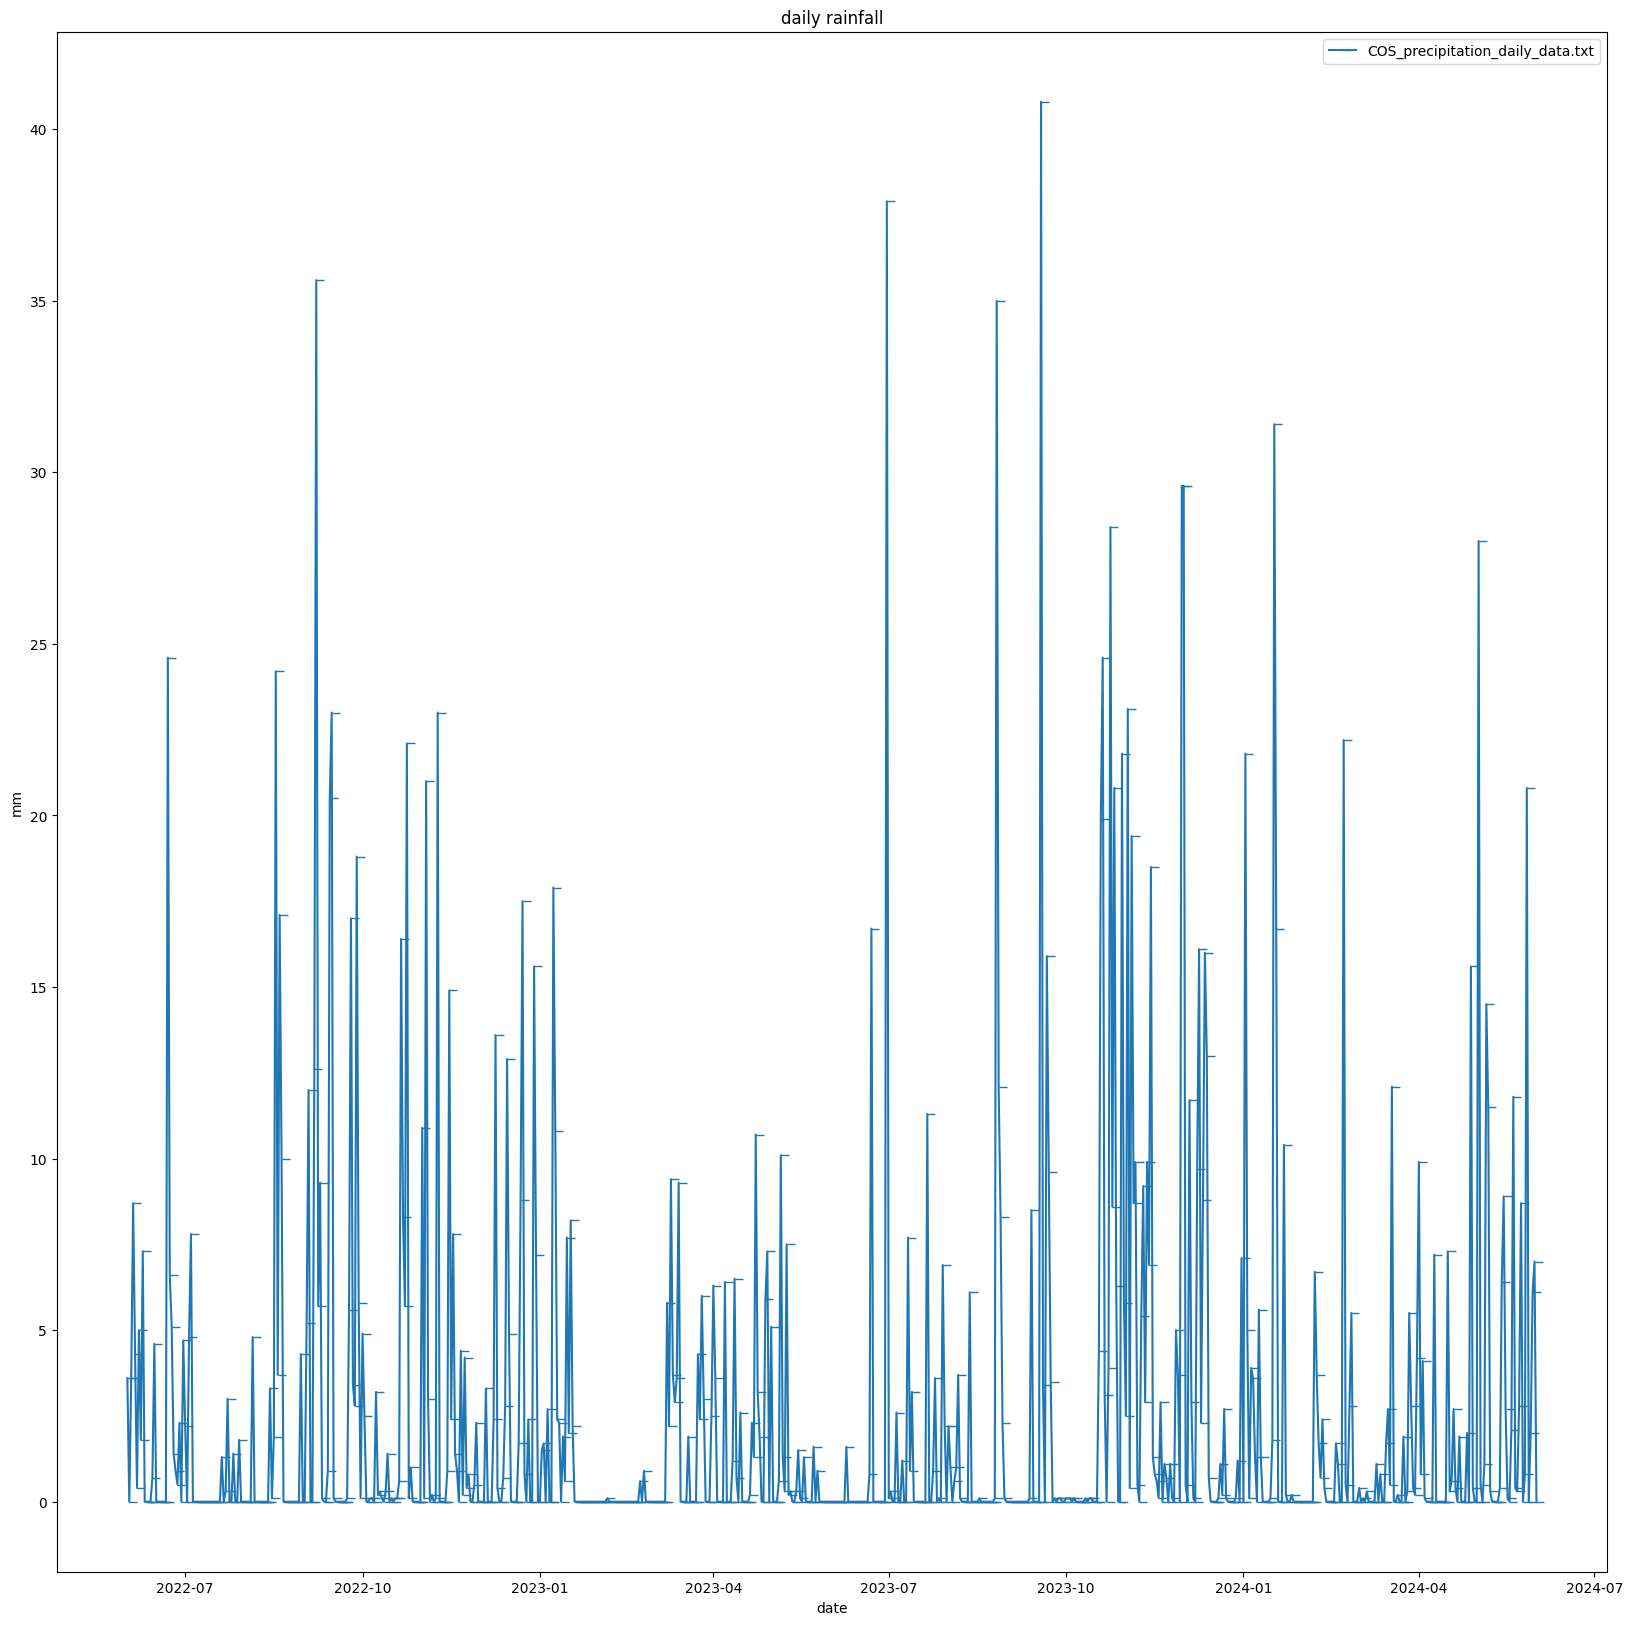

In [179]:
path = Path(base_dir)
#use de line below for all files in the directory to compare data from all weather stations
#weather_data = path.glob('*_precipitation_daily_data.txt')
weather_data = path.glob('COS_precipitation_daily_data.txt')

plt.figure(figsize = (20,20))

for data in weather_data:
    dataset = pd.read_csv(data, sep = ';')
    dataframe = pd.DataFrame(
        {'year': [str(d)[:4] for d in dataset['time']],
        'month': [str(d)[4:6] for d in dataset['time']],
        'day': [str(d)[6:] for d in dataset['time']]})
    time = pd.to_datetime(dataframe)
        
    
    
    plt.plot(time, dataset['rka150d0'], label = data.name, marker = True)
    plt.title('daily rainfall')
    plt.xlabel('date')
    plt.ylabel('mm')
    plt.legend()


            rka150d0
date                
2022-06-05      20.2
2022-06-12      14.5
2022-06-19       5.3
2022-06-26      38.6
2022-07-03      14.5
...              ...
2024-05-05      30.0
2024-05-12      26.3
2024-05-19      20.6
2024-05-26      24.8
2024-06-02      35.9

[105 rows x 1 columns]


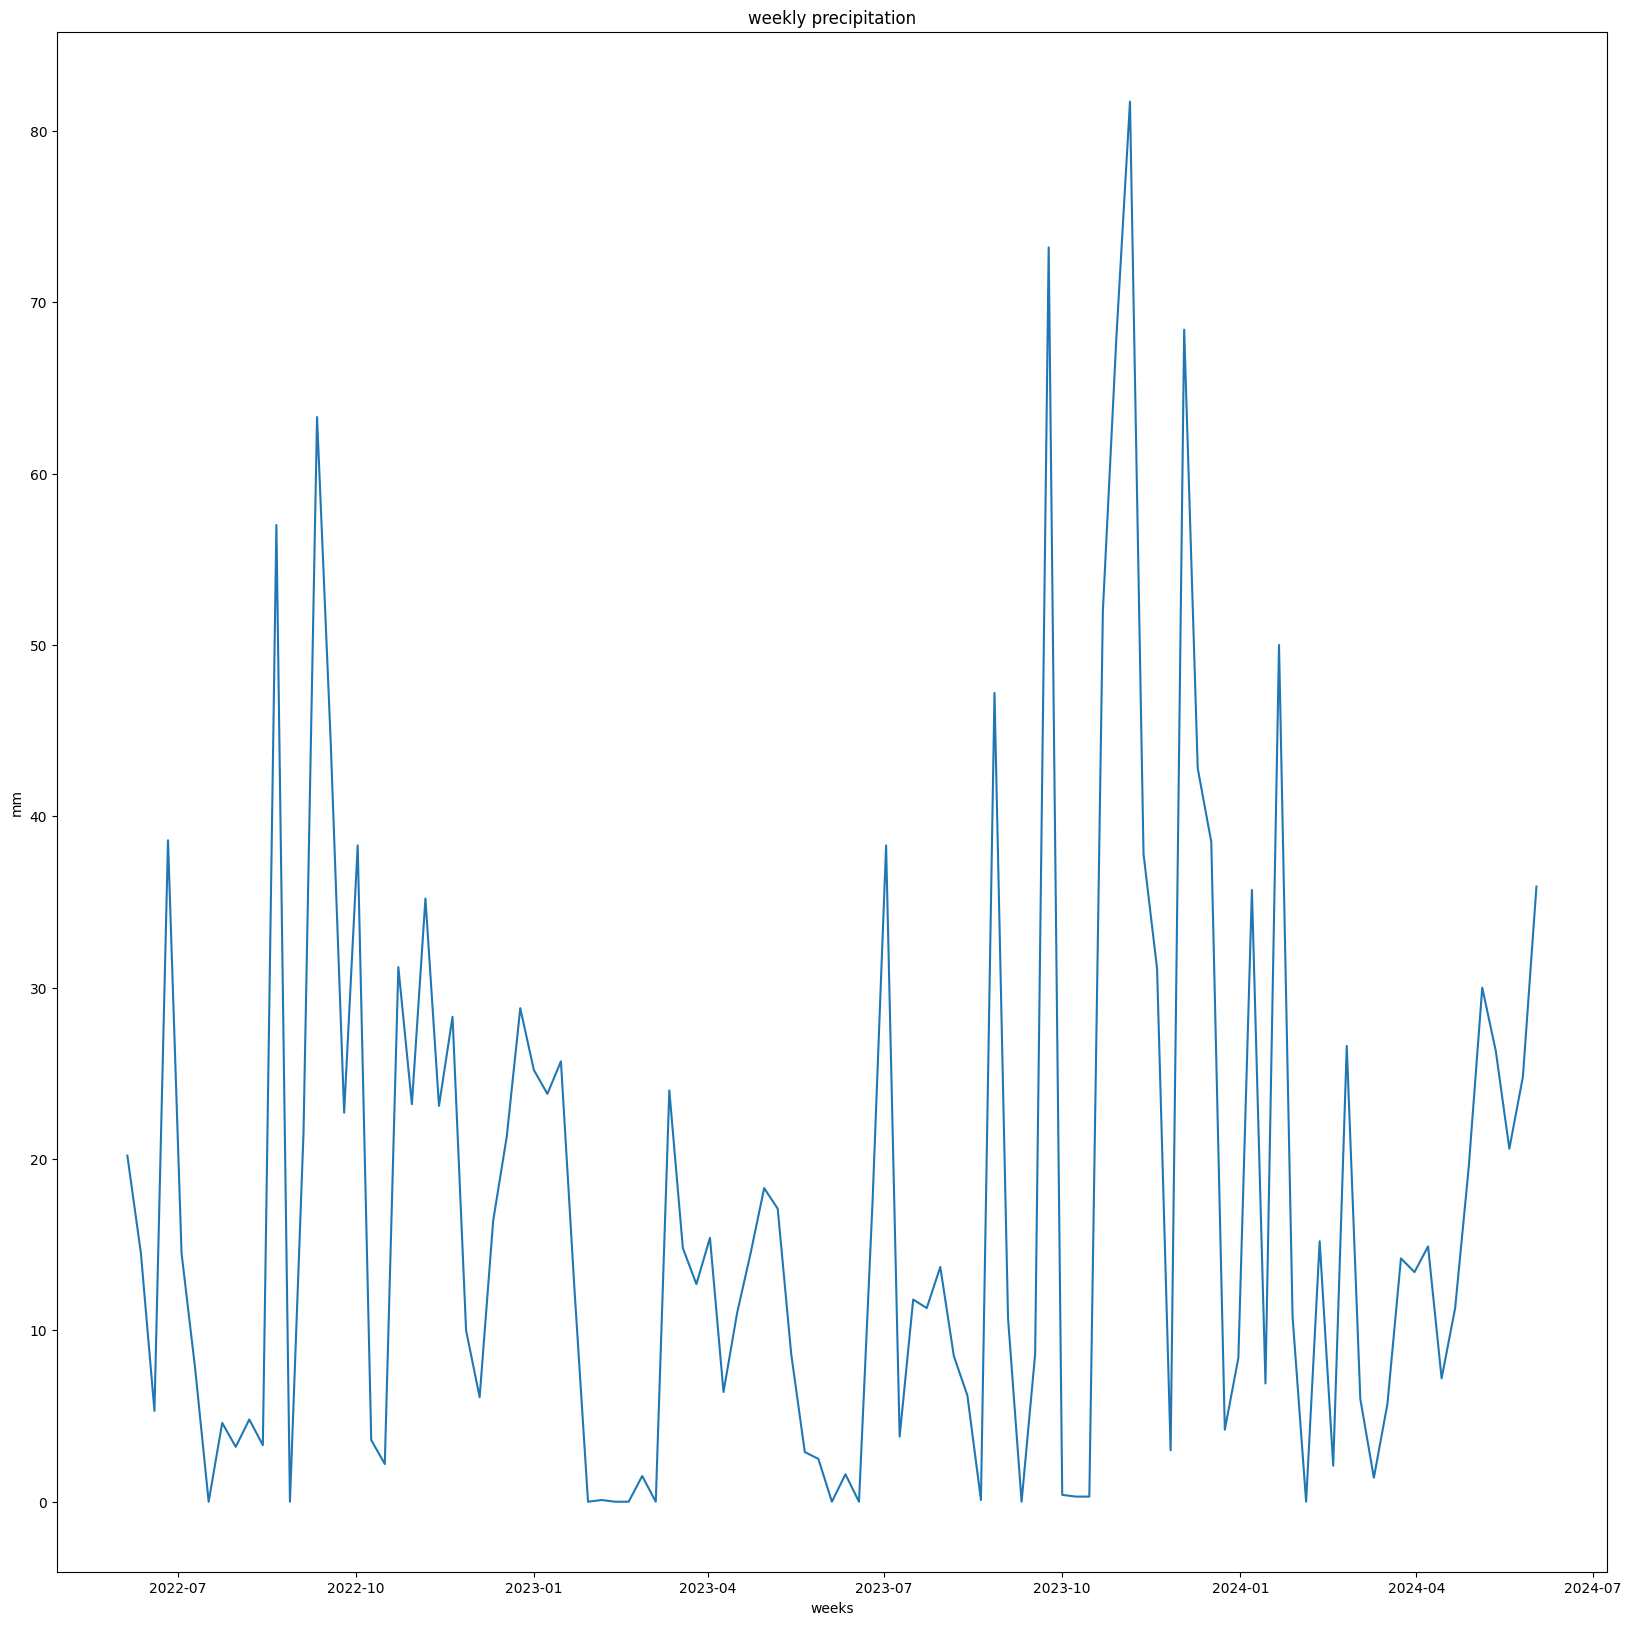

In [4]:
dataset = pd.read_csv(path/'COS_precipitation_daily_data.txt', sep = ';')
dataframe = pd.DataFrame(
    {'year': [str(d)[:4] for d in dataset['time']],
    'month': [str(d)[4:6] for d in dataset['time']],
    'day': [str(d)[6:] for d in dataset['time']]})
time = pd.to_datetime(dataframe)


time2 = pd.DataFrame(time)
time2.columns = ['date']
#time2['week_number'] = time2['date'].dt.isocalendar.week

joined = dataset.join(time2)

week = joined.groupby(pd.Grouper(key='date',freq='W'))['rka150d0'].sum()
weekly_precipitation = pd.DataFrame(week)
print(weekly_precipitation)
plt.figure(figsize = (20,20))
plt.plot(weekly_precipitation.index, weekly_precipitation['rka150d0'])
plt.title("weekly precipitation")
plt.xlabel('weeks')
plt.ylabel('mm')

plt.savefig("C:/Hobbies/programming/figures/weekly_precipitation.png")

            rka150d0
date                
2022-06-05      20.2
2022-06-12      14.5
2022-06-19       5.3
2022-06-26      38.6
2022-07-03      14.5
...              ...
2024-05-05      30.0
2024-05-12      26.3
2024-05-19      20.6
2024-05-26      24.8
2024-06-02      35.9

[105 rows x 1 columns]


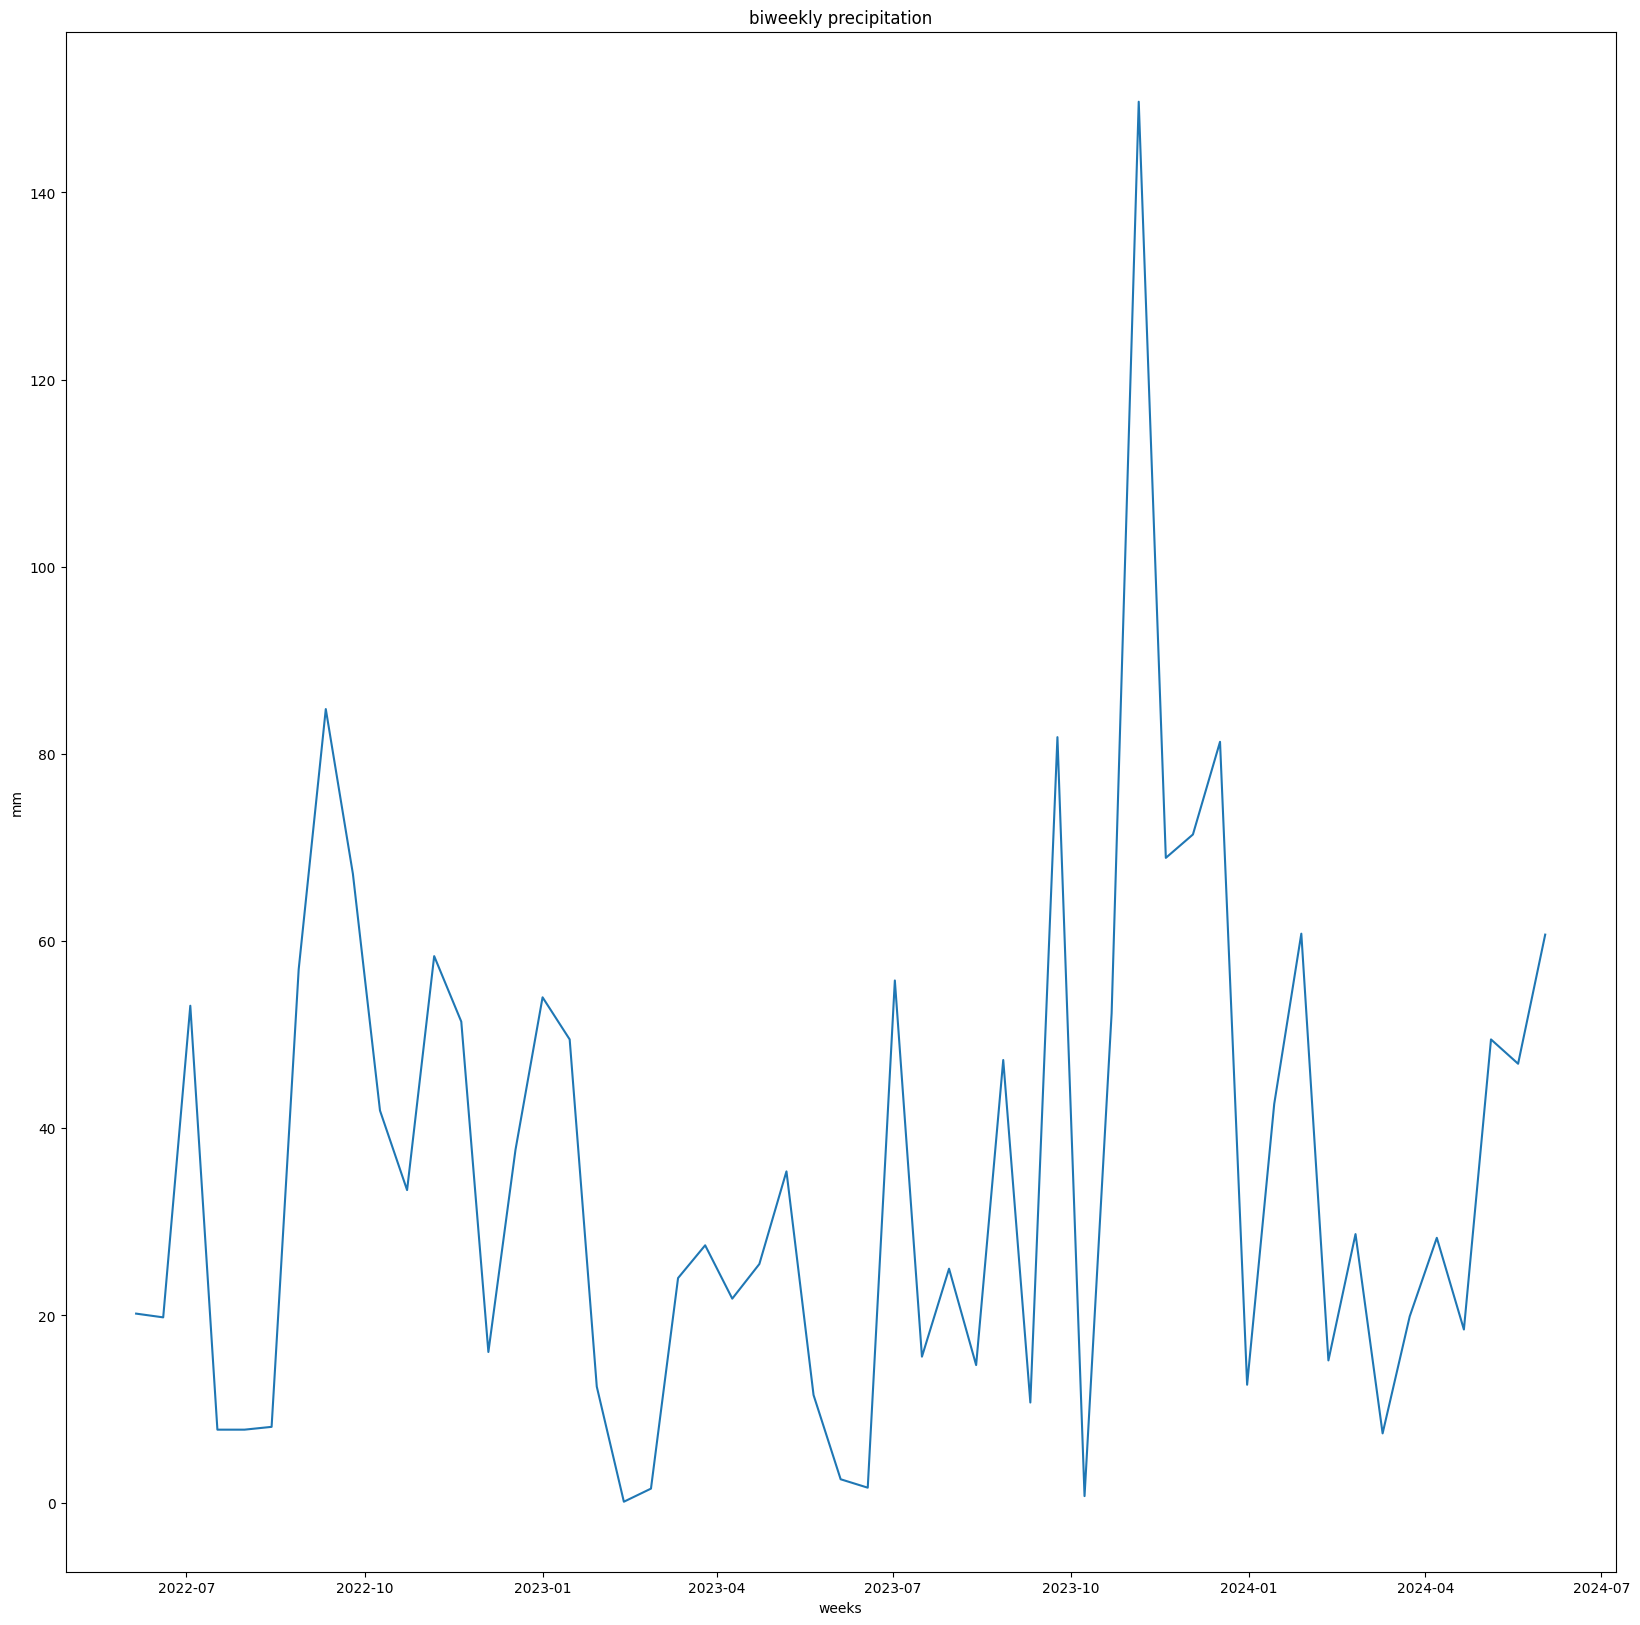

In [5]:
dataset = pd.read_csv(path/'COS_precipitation_daily_data.txt', sep = ';')
dataframe = pd.DataFrame(
    {'year': [str(d)[:4] for d in dataset['time']],
    'month': [str(d)[4:6] for d in dataset['time']],
    'day': [str(d)[6:] for d in dataset['time']]})
time = pd.to_datetime(dataframe)


time2 = pd.DataFrame(time)
time2.columns = ['date']
#time2['week_number'] = time2['date'].dt.isocalendar.week

joined = dataset.join(time2)

week = joined.groupby(pd.Grouper(key='date',freq='2W'))['rka150d0'].sum()
biweekly_precipitation = pd.DataFrame(week)
print(weekly_precipitation)
plt.figure(figsize = (20,20))
plt.plot(biweekly_precipitation.index, biweekly_precipitation['rka150d0'])
plt.title("biweekly precipitation")
plt.xlabel('weeks')
plt.ylabel('mm')

plt.savefig("C:/Hobbies/programming/figures/biweekly_precipitation.png")

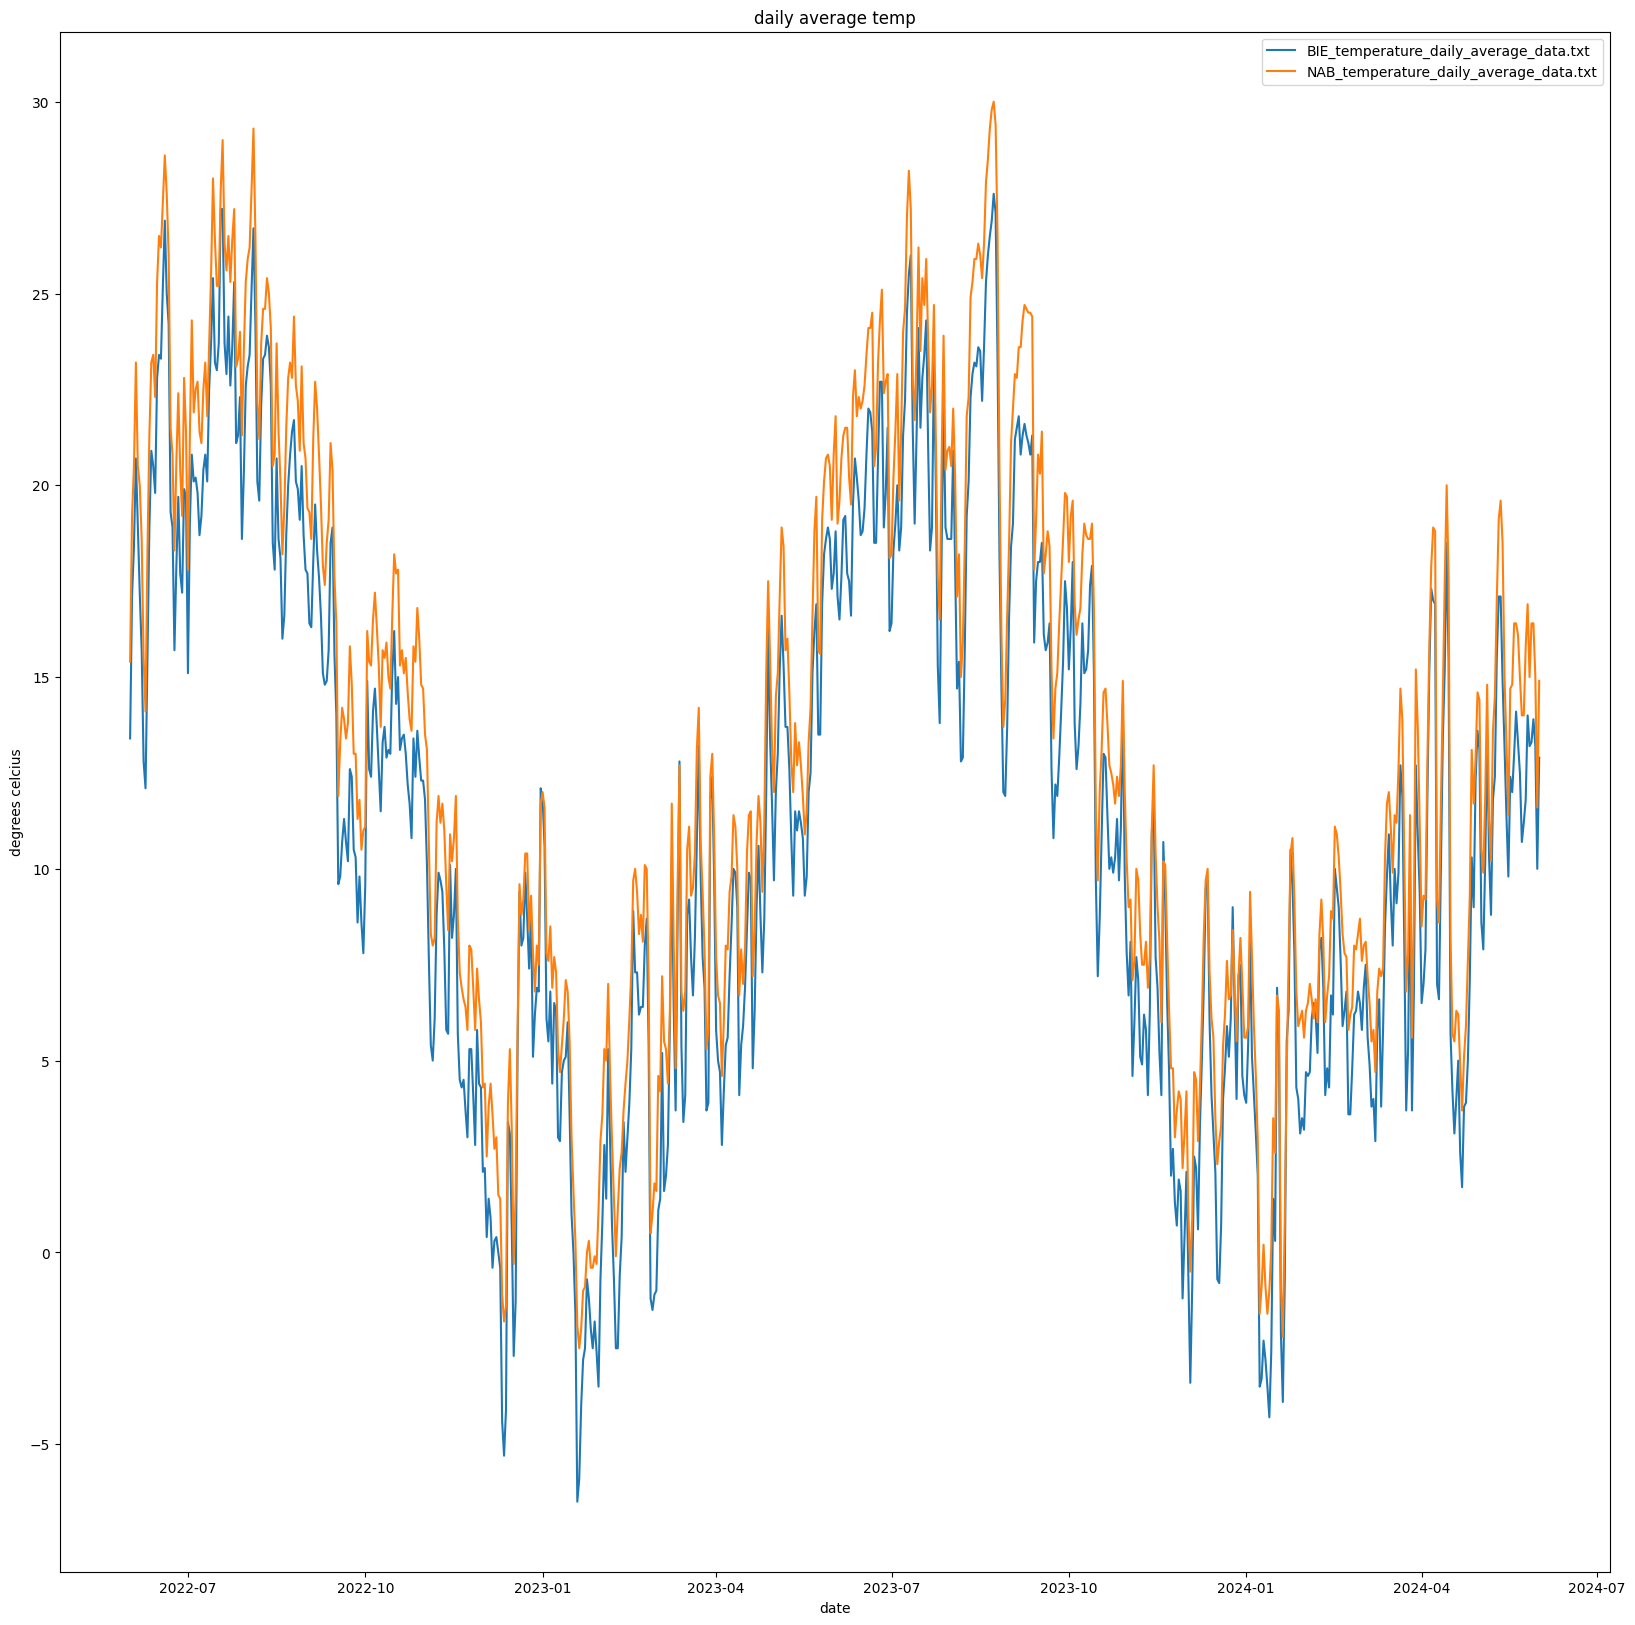

In [6]:
path = Path(base_dir)
weather_data = path.glob('*_temperature_daily_average_data.txt')

plt.figure(figsize = (20,20))

for data in weather_data:
    dataset = pd.read_csv(data, sep = ';')
    dataframe = pd.DataFrame(
        {'year': [str(d)[:4] for d in dataset['time']],
        'month': [str(d)[4:6] for d in dataset['time']],
        'day': [str(d)[6:] for d in dataset['time']]})
    time = pd.to_datetime(dataframe)
        
    
    plt.title('daily average temp')
    plt.xlabel('date')
    plt.ylabel('degrees celcius')
    plt.plot(time, dataset['tre200d0'], label = data.name)
    plt.legend()

    plt.savefig("C:/Hobbies/programming/figures/daily_temp.png")

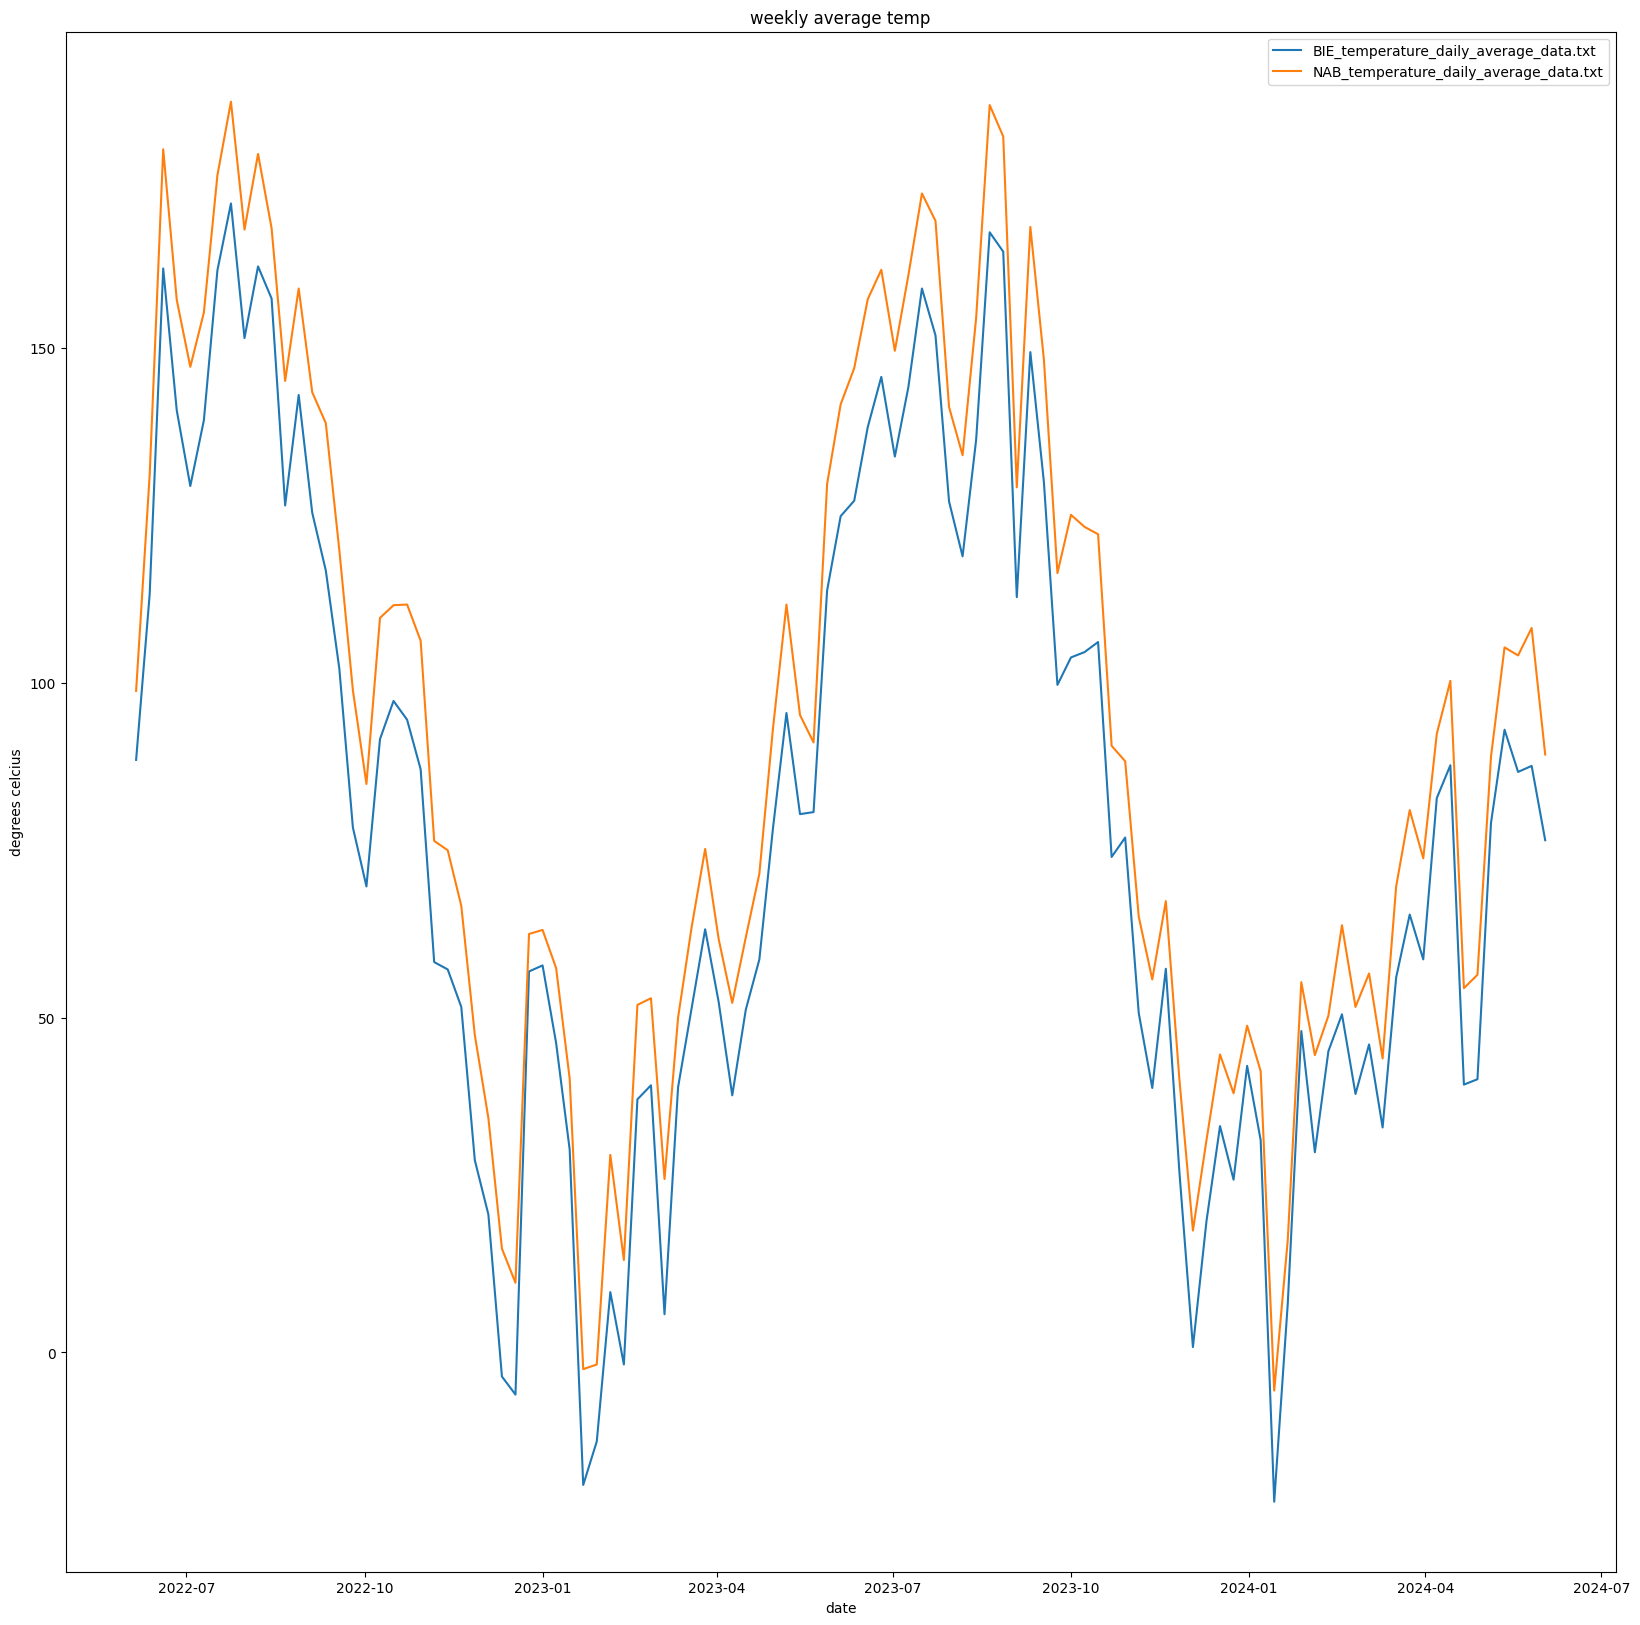

In [7]:




path = Path(base_dir)
weather_data = path.glob('*_temperature_daily_average_data.txt')

plt.figure(figsize = (20,20))

for data in weather_data:
    dataset = pd.read_csv(data, sep = ';')
    dataframe = pd.DataFrame(
        {'year': [str(d)[:4] for d in dataset['time']],
        'month': [str(d)[4:6] for d in dataset['time']],
        'day': [str(d)[6:] for d in dataset['time']]})
    time = pd.to_datetime(dataframe)
    time2 = pd.DataFrame(time)
    time2.columns = ['date']


    joined = dataset.join(time2)

    week = joined.groupby(pd.Grouper(key='date',freq='W'))['tre200d0'].sum()
    weekly_temperature = pd.DataFrame(week)
        
    
    plt.title('weekly average temp')
    plt.xlabel('date')
    plt.ylabel('degrees celcius')
    plt.plot(weekly_temperature.index, weekly_temperature['tre200d0'], label = data.name)
    plt.legend()

    plt.savefig("C:/Hobbies/programming/figures/weekly_temp.png")

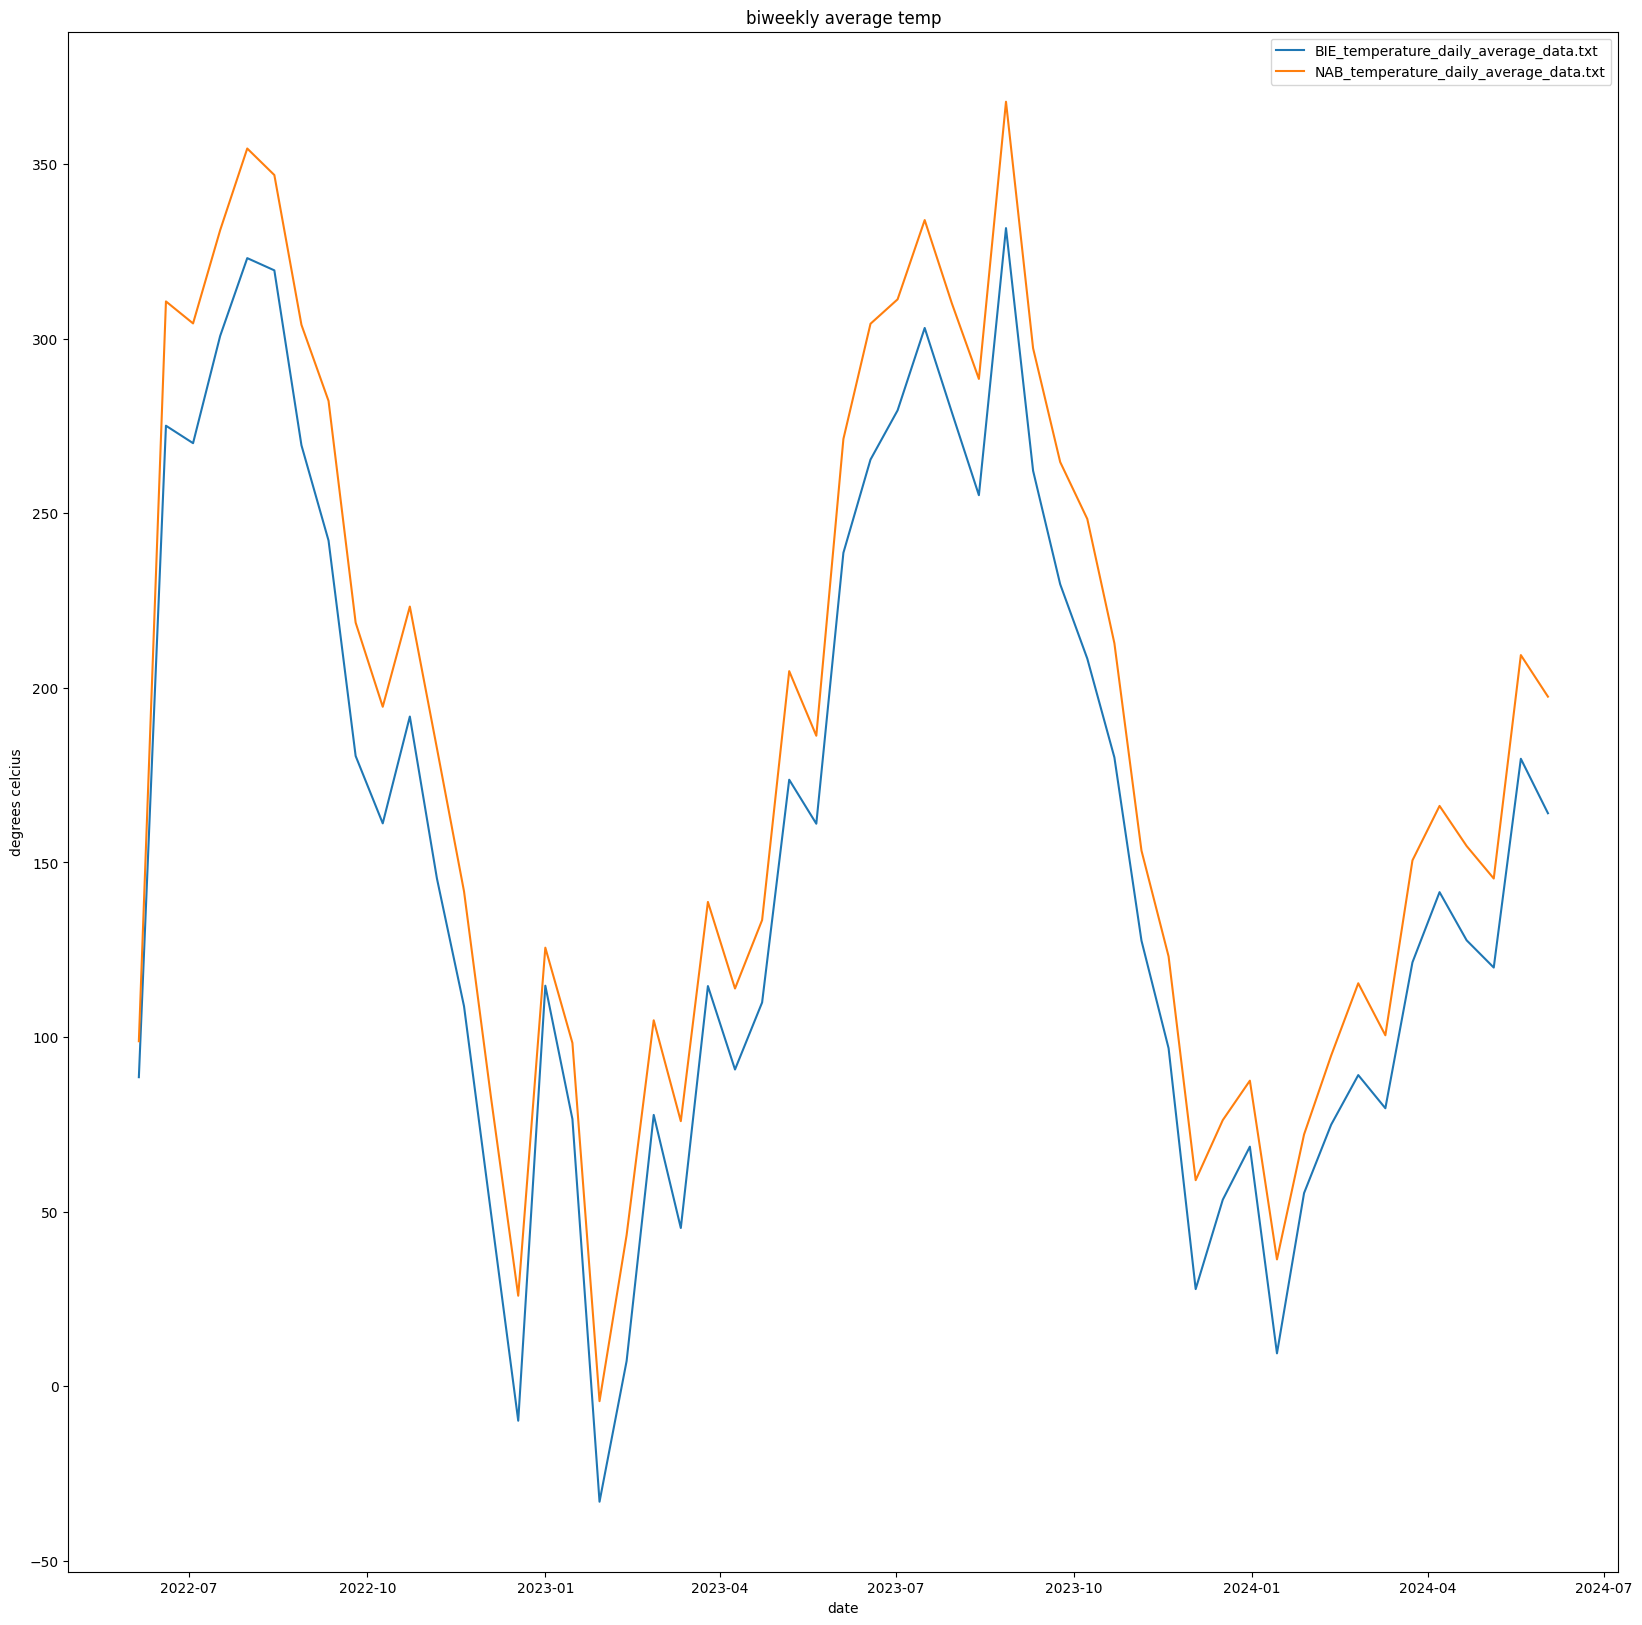

In [8]:
path = Path(base_dir)
weather_data = path.glob('*_temperature_daily_average_data.txt')

plt.figure(figsize = (20,20))

for data in weather_data:
    dataset = pd.read_csv(data, sep = ';')
    dataframe = pd.DataFrame(
        {'year': [str(d)[:4] for d in dataset['time']],
        'month': [str(d)[4:6] for d in dataset['time']],
        'day': [str(d)[6:] for d in dataset['time']]})
    time = pd.to_datetime(dataframe)
    time2 = pd.DataFrame(time)
    time2.columns = ['date']


    joined = dataset.join(time2)

    week = joined.groupby(pd.Grouper(key='date',freq='2W'))['tre200d0'].sum()
    biweekly_temperature = pd.DataFrame(week)
        
    
    plt.title('biweekly average temp')
    plt.xlabel('date')
    plt.ylabel('degrees celcius')
    plt.plot(biweekly_temperature.index, biweekly_temperature['tre200d0'], label = data.name)
    plt.legend()

plt.savefig("C:/Hobbies/programming/figures/biweekly_temp.png")